In [3]:
from geoutils import cube
from geoutils import utils
import xarray as xr
import os

# Generate the list of rasters

In [6]:
img = utils.list_files(os.getcwd(),endswith='.tif')

In [7]:
img

['02.tif', '01.tif']

In [9]:
series = cube.get_imgs(img,chunks=(4004, 4004))

In [10]:
print(type(series))
print("number of the images: {}".format(len(series)))

<class 'list'>
number of the images: 2


# Generating Cube

In [13]:
# for each image we need to have date. It is better to define it based on the Day
cu_obj = cube.cube(series)

In [14]:
cu_obj

In [15]:
cu = cu_obj.generate_cube('2019-01-01',freq='14D')

In [17]:
cu

<xarray.DataArray 'raster' (time: 2, band: 8, y: 294, x: 328)>
dask.array<concatenate, shape=(2, 8, 294, 328), dtype=uint16, chunksize=(1, 8, 294, 328), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) int64 1 2 3 4 5 6 7 8
  * y        (y) float64 47.64 47.64 47.64 47.64 ... 47.57 47.57 47.57 47.57
  * x        (x) float64 10.25 10.25 10.25 10.25 ... 10.33 10.33 10.33 10.33
  * time     (time) datetime64[ns] 2019-01-01 2019-01-15
Attributes:
    transform:      (0.00025000000000000223, 0.0, 10.2495, 0.0, -0.0002499999...
    crs:            +init=epsg:4326
    res:            (0.00025000000000000223, 0.0002499999999999853)
    is_tiled:       0
    nodatavals:     (nan, nan, nan, nan, nan, nan, nan, nan)
    scales:         (1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)
    offsets:        (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
    AREA_OR_POINT:  Area

In [16]:
cu.to_dataframe().head()

raster
time       band y         x                
2019-01-01 1    47.643875 10.249625       0
                          10.249875       0
                          10.250125       0
                          10.250375       0
                          10.250625       0

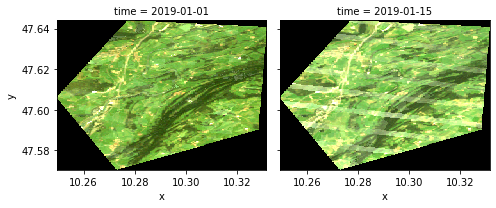

In [19]:
rgb_band= [3,2,1]
cu.sel(band=rgb_band).plot.imshow(col='time',robust=True)

# Generating Mosaic

In [20]:
mosaic = cu_obj.generate_mosaic()

In [21]:
mosaic

<xarray.DataArray (band: 8, y: 294, x: 328)>
dask.array<concatenate, shape=(8, 294, 328), dtype=float64, chunksize=(1, 294, 328), chunktype=numpy.ndarray>
Coordinates:
  * y            (y) float64 47.64 47.64 47.64 47.64 ... 47.57 47.57 47.57 47.57
  * x            (x) float64 10.25 10.25 10.25 10.25 ... 10.33 10.33 10.33 10.33
    spatial_ref  int64 0
Dimensions without coordinates: band
Attributes:
    grid_mapping:  spatial_ref

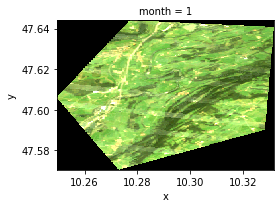

In [22]:
xr.DataArray(cu).groupby('time.month').median(dim='time').sel(band=rgb_band).plot.imshow(col='month',robust=True)

# Save the file as a GeoTIFF

In [23]:
cube.to_tif(mosaic,'result_geotif.tif',crs=3035,cell_size=10)

the file was saved!


# Save as NetCDF

In [24]:
cu.to_netcdf('result_NetCDF.nc')

# Refrence
* https://medium.com/@bonnefond.virginie/handling-multi-temporal-satellite-images-with-xarray-30d142d3391